# Virus Chino

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [7]:
#mainpath = "C:/Users/Guany/Documents/"
#mainpath = "C:/Users/ASUS/Documents/"
fullpath = "/content/drive/MyDrive/Covid19Casos.csv"
#filename = "Covid19casos.csv"
#fullpath = os.path.join(mainpath, filename)

In [8]:
VC = pd.read_csv(fullpath)
VC.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,10000000,F,52.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,0,2021-04-21
1,10000001,F,22.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-05,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,6,Público,Caso Descartado,Descartado,6,2021-04-08,490,2021-04-21
2,10000002,F,43.0,Años,Argentina,Buenos Aires,La Matanza,CABA,NaN,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,2,Público,Caso Descartado,Descartado,6,2021-04-06,427,2021-04-21
3,10000003,F,33.0,Años,Argentina,CABA,COMUNA 01,CABA,NaN,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,1,2021-04-21
4,10000004,F,32.0,Años,Argentina,CABA,COMUNA 08,CABA,NaN,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-06,8,2021-04-21


In [9]:
VC.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,3.207875e+06,3.207163e+06,3.207875e+06,3.207875e+06,3.207875e+06,3.207875e+06
mean,9.204282e+06,3.836488e+01,1.158873e+01,2.116718e+01,2.284711e+01,1.809832e+02
std,9.823085e+05,1.755569e+01,3.033222e+00,2.766812e+01,2.823866e+01,2.468827e+02
min,7.500001e+06,-1.400000e+01,6.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
25%,8.351224e+06,2.600000e+01,9.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
50%,9.214978e+06,3.600000e+01,1.200000e+01,6.000000e+00,6.000000e+00,5.600000e+01
75%,1.005501e+07,5.000000e+01,1.400000e+01,2.600000e+01,3.400000e+01,2.940000e+02
max,1.089661e+07,2.210000e+02,1.600000e+01,9.400000e+01,9.900000e+01,8.820000e+02


In [10]:
pd.isnull(VC["edad_años_meses"]).values.ravel().sum()

0

In [11]:
VC["fecha_diagnostico"] = pd.to_datetime(VC["fecha_diagnostico"])

In [12]:
pd.isnull(VC["edad"]).values.ravel().sum()

712

In [13]:
VC["edad"].mean()

38.36488291988901

In [14]:
VC["edad"].describe()

count    3.207163e+06
mean     3.836488e+01
std      1.755569e+01
min     -1.400000e+01
25%      2.600000e+01
50%      3.600000e+01
75%      5.000000e+01
max      2.210000e+02
Name: edad, dtype: float64

In [15]:
VC.loc[737]

id_evento_caso                                                               10000750
sexo                                                                                F
edad                                                                               40
edad_años_meses                                                                  Años
residencia_pais_nombre                                                      Argentina
residencia_provincia_nombre                                              Buenos Aires
residencia_departamento_nombre                                                  Pilar
carga_provincia_nombre                                                   Buenos Aires
fecha_inicio_sintomas                                                      2021-04-04
fecha_apertura                                                             2021-04-08
sepi_apertura                                                                      14
fecha_internacion                                     

In [16]:
VC.loc[VC['edad_años_meses'] == "Meses", ["edad"]] = 0
VC.loc[VC['edad_años_meses'] == "Meses",  ['edad_años_meses']]= "Años"
VC = VC.drop(VC[VC['edad_años_meses'] == 39].index)
VC = VC.drop(VC[VC['sexo'] == 39].index)

In [17]:
VC['sexo'].value_counts()

F     1689628
M     1500964
NR      17283
Name: sexo, dtype: int64

In [18]:
pd.isnull(VC["edad"]).values.ravel().sum()

712

In [19]:
VC["edad"] = VC["edad"].fillna(int(VC["edad"].mean()))

In [20]:
#VC[VC['edad'] >= 105] = int(VC["edad"].mean())
#VC[VC['edad'] < 0] = int(VC["edad"].mean())
VC.loc[VC['edad']  > 105, ["edad"]] = int(VC["edad"].mean())
VC.loc[VC['edad'] < 0 ,  ['edad']]= int(VC["edad"].mean())

In [21]:
VC["edad"].mean()

38.34260530725169

In [22]:
VC["edad_años_meses"].value_counts()

Años    3207875
Name: edad_años_meses, dtype: int64

In [23]:
VC[VC["edad_años_meses"] == 39]

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion


In [24]:
VC['edad'].value_counts()

30.0     79595
29.0     79373
32.0     75963
31.0     75696
34.0     75212
         ...  
101.0       59
102.0       42
103.0       32
104.0       10
105.0        7
Name: edad, Length: 106, dtype: int64

In [25]:
VC['edad'].min()

0.0

In [26]:
VC['edad'].max()

105.0

In [27]:
VC["edad"].mode()

0    30.0
dtype: float64

Text(0.5, 1.0, 'Histograma de distribucion de testeos covid por edad')

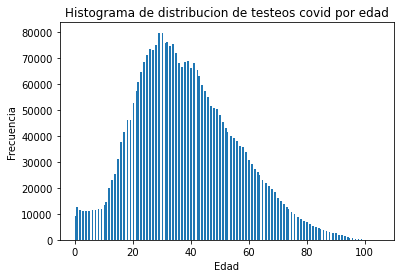

In [28]:
plt.hist(VC["edad"], bins= 200)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de distribucion de testeos covid por edad")

In [29]:
VC["edad"].describe()

count    3.207875e+06
mean     3.834261e+01
std      1.757926e+01
min      0.000000e+00
25%      2.600000e+01
50%      3.600000e+01
75%      5.000000e+01
max      1.050000e+02
Name: edad, dtype: float64

Text(0.5, 1.0, 'Boxplot de testeos por edad')

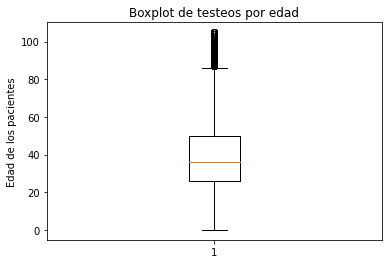

In [30]:
plt.boxplot(VC["edad"])
plt.ylabel("Edad de los pacientes")
plt.title("Boxplot de testeos por edad")

In [31]:
VC["edad"].mode()

0    30.0
dtype: float64

In [32]:
VC['edad_años_meses'].unique()

array(['Años'], dtype=object)

Text(0.5, 1.0, 'Histograma de distribucion de pacientes covid por sexo')

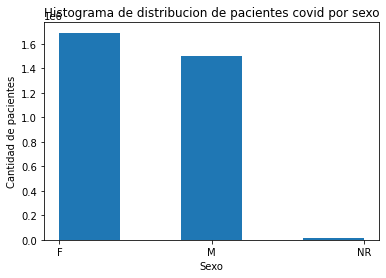

In [34]:
plt.hist(VC["sexo"], bins=5)
plt.xlabel("Sexo")
plt.ylabel("Cantidad de pacientes")
plt.title("Histograma de distribucion de pacientes covid por sexo")

In [35]:
VC["sexo"].value_counts()

F     1689628
M     1500964
NR      17283
Name: sexo, dtype: int64

In [36]:
confirmados = VC[["clasificacion_resumen", "fecha_diagnostico", "residencia_provincia_nombre" , "fallecido", "fecha_fallecimiento" ]]

In [37]:
confirmados = confirmados.replace(to_replace="Confirmado", value=1)

In [38]:
confirmados["fallecido"] = confirmados.fallecido.replace(to_replace="SI", value=1)
confirmados["fallecido"] = confirmados.fallecido.replace(to_replace="NO", value=0)
#confirmados["fecha_fallecimiento"] = confirmados["fecha_fallecimiento"].fillna("N")

In [39]:
confirmados["fecha_fallecimiento"].isnull().sum()

3199094

In [40]:
type(confirmados["fecha_diagnostico"][5])

pandas._libs.tslibs.timestamps.Timestamp

In [41]:
#confirmados = confirmados.dropna()

In [42]:
confirmados = confirmados[confirmados["clasificacion_resumen"]== 1]

In [43]:
confirmados[confirmados["residencia_provincia_nombre"]=="SIN ESPECIFICAR"]

,clasificacion_resumen,fecha_diagnostico,residencia_provincia_nombre,fallecido,fecha_fallecimiento
666,1,2021-04-14,SIN ESPECIFICAR,0,NaN
703,1,2021-04-19,SIN ESPECIFICAR,0,NaN
2604,1,2021-04-09,SIN ESPECIFICAR,0,NaN
4410,1,2021-03-31,SIN ESPECIFICAR,0,NaN
5801,1,NaT,SIN ESPECIFICAR,0,NaN
...,...,...,...,...,...
3193120,1,2021-04-07,SIN ESPECIFICAR,0,NaN
3193544,1,2021-04-06,SIN ESPECIFICAR,0,NaN
3195814,1,2021-04-09,SIN ESPECIFICAR,0,NaN
3196518,1,2021-04-08,SIN ESPECIFICAR,0,NaN


In [ ]:
#confirmados = confirmados.drop(labels="clasificacion_resumen", axis=1)

In [ ]:
#confirmados = confirmados.drop(labels=2192241, axis=0)
#confirmados = confirmados.drop(labels=2337905, axis=0)
#confirmados = confirmados.drop(labels=2440280, axis=0)
#confirmados = confirmados.drop(labels=4794269, axis=0)
#confirmados = confirmados.drop(labels=1619136, axis=0)
#confirmados = confirmados.drop(labels=6949111, axis=0)
#confirmados = confirmados.drop(labels=1824030, axis=0)

In [44]:
confirmados = confirmados[confirmados["fecha_diagnostico"] > "2020-03-02"]

In [45]:
confirmados["fecha_diagnostico"] = pd.to_datetime(confirmados["fecha_diagnostico"])

In [46]:
confirmados = confirmados.sort_values("fecha_diagnostico")

In [75]:
confirmados = confirmados.reset_index()
confirmados = confirmados.drop(labels="index", axis=1)

In [48]:
type(confirmados["fecha_diagnostico"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [49]:
confirmados[confirmados["fallecido"]==1]

,clasificacion_resumen,fecha_diagnostico,residencia_provincia_nombre,fallecido,fecha_fallecimiento
179,1,2020-09-15,Córdoba,1,2020-09-22
207,1,2020-09-28,Corrientes,1,2020-10-01
212,1,2020-09-29,La Rioja,1,2020-09-30
226,1,2020-10-02,Córdoba,1,2020-10-10
234,1,2020-10-05,Córdoba,1,2020-10-17
...,...,...,...,...,...
680362,1,2021-04-21,Buenos Aires,1,2021-04-20
680655,1,2021-04-21,Buenos Aires,1,2021-04-18
680792,1,2021-04-21,Buenos Aires,1,2021-04-20
681119,1,2021-04-21,Buenos Aires,1,2021-04-20


In [58]:
confirmados["clasificacion_resumen"]=1

In [59]:
confirmgroup = confirmados.groupby("fecha_diagnostico")

In [60]:
confirmgroup.sum()

,clasificacion_resumen,fallecido
fecha_diagnostico,,
2020-03-06,1,0
2020-07-04,2,0
2020-07-05,2,0
2020-07-07,3,0
2020-07-10,1,0
...,...,...
2021-04-17,14840,19
2021-04-18,10239,12
2021-04-19,21780,29


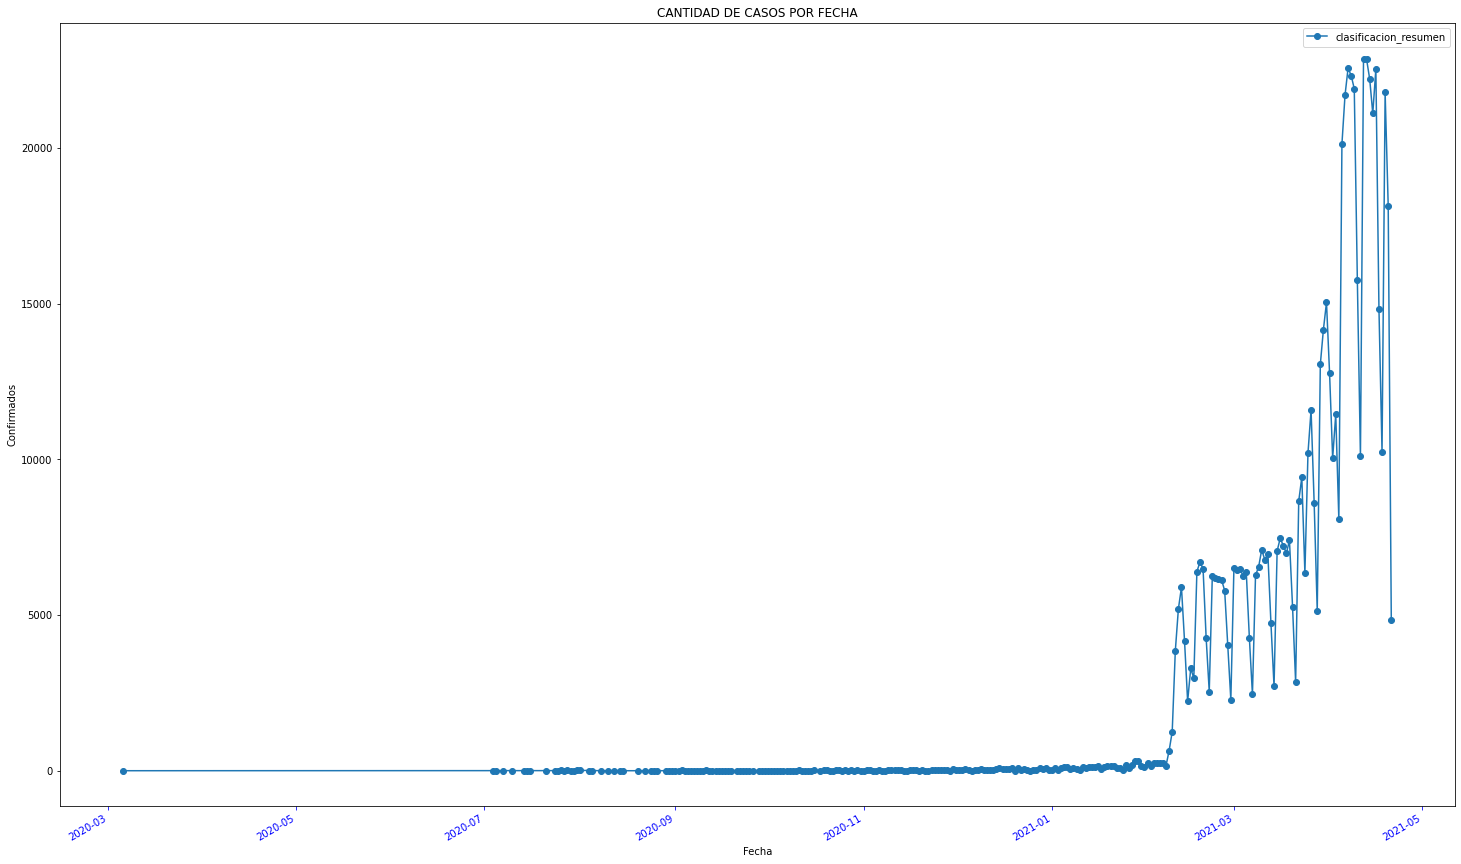

In [61]:
confirmgroup.sum().plot(kind="line",y="clasificacion_resumen", figsize=(25,16), marker= "o")
#linestyle"--""
plt.xlabel("Fecha")
plt.title("CANTIDAD DE CASOS POR FECHA")
plt.tick_params('x', colors='blue')
plt.ylabel("Confirmados")
plt.show()

In [62]:
fall = pd.DataFrame()
fall["fallecido"] = confirmados["fallecido"]
fall["fecha_fallecimiento"] = confirmados["fecha_fallecimiento"]
fall = fall[fall["fallecido"]==1]
fallgroup = fall.groupby("fecha_fallecimiento")

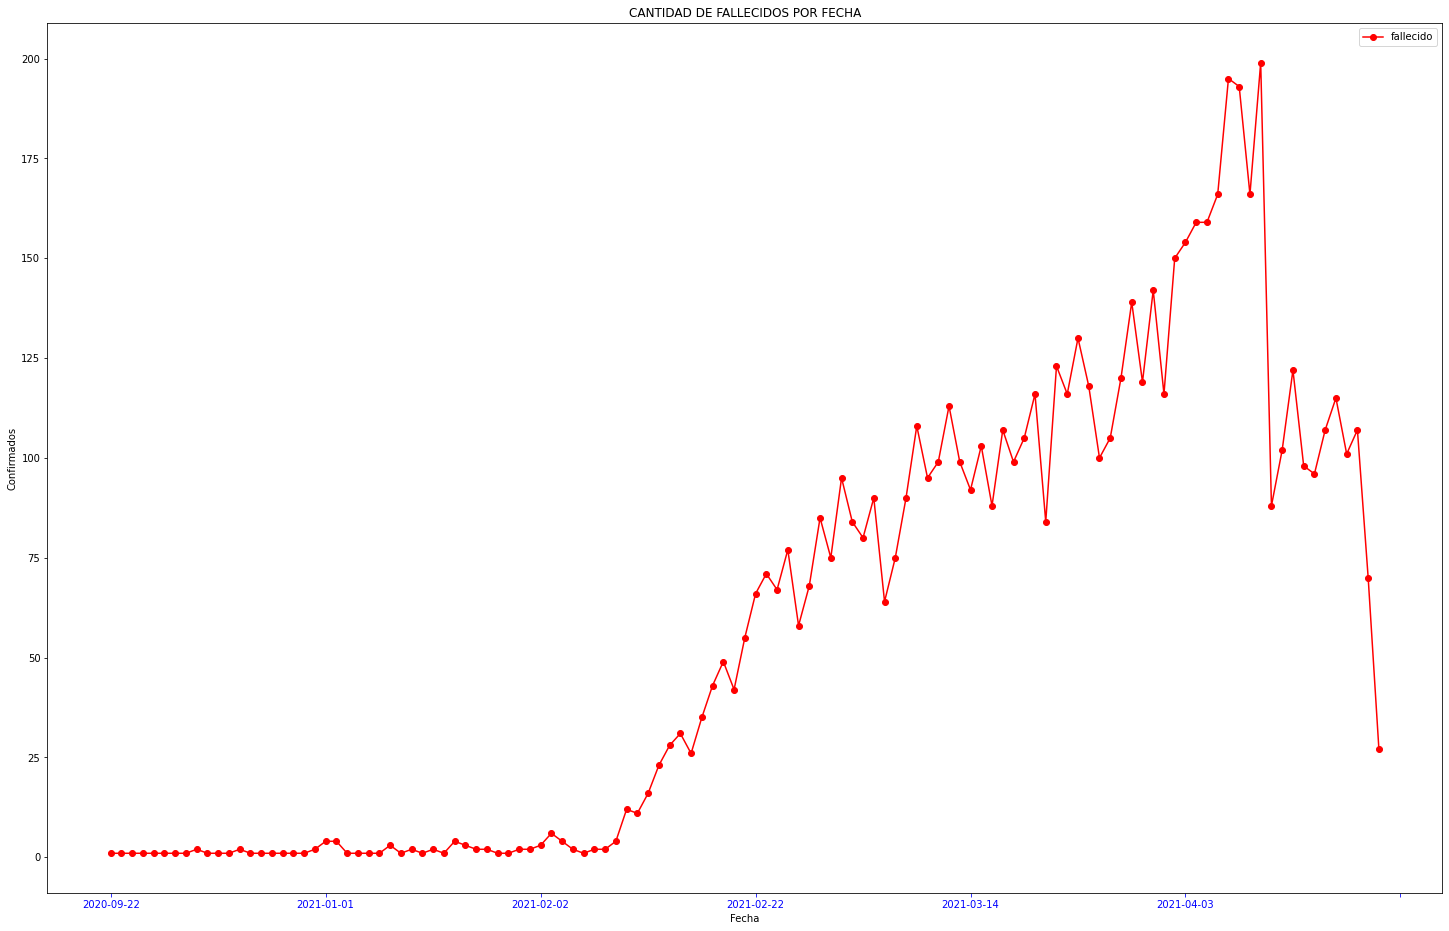

In [63]:
fallgroup.sum().plot(kind="line",y="fallecido", figsize=(25,16), marker= "o", color="r")
#linestyle"--""
plt.xlabel("Fecha")
plt.title("CANTIDAD DE FALLECIDOS POR FECHA")
plt.tick_params('x', colors='blue')
plt.ylabel("Confirmados")
plt.show()

In [64]:
confirmgroup.head()

,clasificacion_resumen,fecha_diagnostico,residencia_provincia_nombre,fallecido,fecha_fallecimiento
0,1,2020-03-06,Neuquén,0,NaN
1,1,2020-07-04,Corrientes,0,NaN
2,1,2020-07-04,Corrientes,0,NaN
3,1,2020-07-05,Corrientes,0,NaN
4,1,2020-07-05,Corrientes,0,NaN
...,...,...,...,...,...
679594,1,2021-04-21,La Pampa,0,NaN
679595,1,2021-04-21,Buenos Aires,0,NaN
679596,1,2021-04-21,Buenos Aires,0,NaN
679597,1,2021-04-21,Santa Fe,0,NaN


In [72]:
confirmgroup["clasificacion_resumen"].sum()

fecha_diagnostico
2020-03-06        1
2020-07-04        2
2020-07-05        2
2020-07-07        3
2020-07-10        1
              ...  
2021-04-17    14840
2021-04-18    10239
2021-04-19    21780
2021-04-20    18139
2021-04-21     4851
Name: clasificacion_resumen, Length: 263, dtype: int64

In [81]:
cont = 1
dataregresion = pd.DataFrame(columns=["Fecha", "Positivos", "Dia"])
dataregresion["Positivos"] = confirmgroup["clasificacion_resumen"].sum()
dataregresion["Fecha"] = confirmgroup["fecha_diagnostico"]
dataregresion = dataregresion.reset_index()
#dataregresion = dataregresion.drop(labels="index", axis=1)
for i in range (len(dataregresion)):
    dataregresion["Dia"][i] = cont
    cont = cont + 1

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
dataregresion.head()

,fecha_diagnostico,Fecha,Positivos,Dia
0,2020-03-06,"(2020-03-06 00:00:00, [2020-03-06 00:00:00])",1,1
1,2020-07-04,"(2020-07-04 00:00:00, [2020-07-04 00:00:00, 20...",2,2
2,2020-07-05,"(2020-07-05 00:00:00, [2020-07-05 00:00:00, 20...",2,3
3,2020-07-07,"(2020-07-07 00:00:00, [2020-07-07 00:00:00, 20...",3,4
4,2020-07-10,"(2020-07-10 00:00:00, [2020-07-10 00:00:00])",1,5


In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
X_pred = dataregresion["Dia"]
X_pred = X_pred[:,np.newaxis]
Y = dataregresion["Positivos"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [85]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
lm.intercept_


-3673.323310016545

In [87]:
lm.coef_

array([47.54375592])

In [88]:
lm.score(X_pred, Y)

0.46068722114671407

#### y = 390.76 + 27.542222 * dia

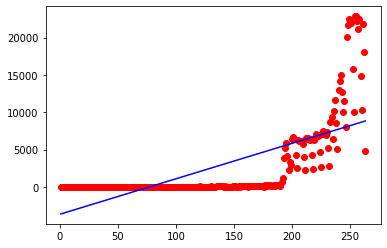

In [89]:
%matplotlib inline
plt.plot(X_pred,Y, "ro")
plt.plot(X_pred, lm.predict(X_pred), color="blue")

In [ ]:
SSD = np.sum((Y - lm.predict(X_pred))**2)
RSE = np.sqrt(SSD/(len(X_pred)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(5914802789.321528, 3793.5797952043654, 6078.228155339806, 62.412592917751105)

#### intentando una cuadratica

In [ ]:
X_data = dataregresion["Dia"]**2
X_data = np.asarray(X_data)
X_data = X_data[:,np.newaxis]
lm = LinearRegression()
lm.fit(X_data, Y)
lm.score(X_data, Y)

0.3414886440378395

In [ ]:
dataregresion.tail()

,Fecha,Positivos,Dia
407,2021-04-16,22491,408
408,2021-04-17,14724,409
409,2021-04-18,9899,410
410,2021-04-19,18932,411
411,2021-04-20,5884,412


In [ ]:
dataregresion_corto = dataregresion[(dataregresion["Fecha"]>"2021-03-18") & (dataregresion["Fecha"]<"2021-04-20")]

In [ ]:
dataregresion_corto.tail()

,Fecha,Positivos,Dia
406,2021-04-15,21191,407
407,2021-04-16,22491,408
408,2021-04-17,14724,409
409,2021-04-18,9899,410
410,2021-04-19,18932,411


In [ ]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(6806145122.383106, 4069.3935422147056, 6078.228155339806, 66.95032562474128)

In [ ]:
lm.intercept_, lm.coef_ , lm.score(X_data, Y), 

(2801.371173511617, array([0.05770384]), 0.3414886440378395)

In [ ]:
dataregresion_corto = dataregresion_corto.reset_index()

In [ ]:
dataregresion_corto = dataregresion_corto.drop(labels="index", axis=1)

In [ ]:
#X_data = dataregresion_corto["Dia"]
X_data =np.arange(0,len(dataregresion_corto))
X_data = X_data[:,np.newaxis]
Y = dataregresion_corto["Positivos"]

In [ ]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
lm.intercept_, lm.coef_ , lm.score(X_data, Y), 

(6871.28307692308, array([728.55307692]), 0.6839909027898381)

#### Funcion y= 6871.283077 + 728.553077*Dia Numero

In [ ]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(318797572.1776922, 3644.616876171007, 15613.92, 23.342100357700097)

In [ ]:
6871.283077 + (728.553077*413)

307763.70387800003

In [ ]:
dataregresion_corto.head()

,Fecha,Positivos,Dia
0,2021-03-19,7494,380
1,2021-03-20,5350,381
2,2021-03-21,2900,382
3,2021-03-22,8845,383
4,2021-03-23,9590,384


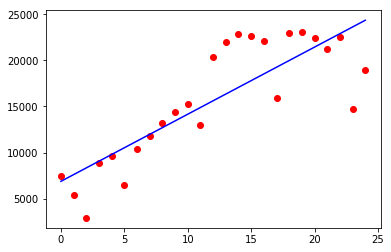

In [ ]:
%matplotlib inline
plt.plot(X_data,Y, "ro")
plt.plot(X_data, lm.predict(X_data), color="blue")

In [ ]:
dataregresion_corto[(dataregresion_corto["Dia"] > 387) & (dataregresion_corto["Positivos"] < 12000) ]

,Fecha,Positivos,Dia


In [ ]:
#dataregresion_corto = dataregresion_corto.drop([8, 9, 16, 23, 30, 14 ,15]) #LIMPIANDO OUTLIERS